In [34]:
import sys
import os
from os.path import basename, join, realpath

parent_dir = os.getcwd()
current_dir = parent_dir
while basename(current_dir) != "Pokemon_Generator":
    current_dir = realpath(join(current_dir, '..'))
    if parent_dir == current_dir:
        raise FileNotFoundError()
    parent_dir = current_dir
sys.path.append(current_dir)
os.chdir(current_dir)

In [35]:
import torch
from torchvision import transforms
import models.VAE as vae
import Dataset
import matplotlib.pyplot as plt
from configs.config import load_yaml
import numpy as np

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5372549..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.60625273..1.0].


Avarage expectation:  0.006348654627799988
Avarage variance:  0.3637140691280365


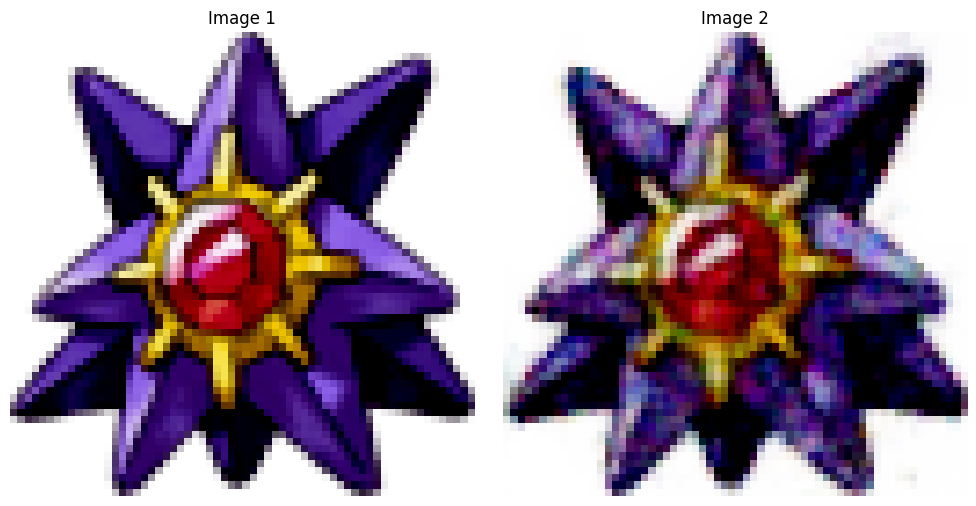

In [60]:
# Assuming vae.VAE() is your PyTorch model
conf = load_yaml('VAE.yaml')
model = vae.VAE(conf)
model.load_state_dict(torch.load('outputs/kld=0.005, latent=128, conv=2/last.ckpt')['state_dict'])

# Define your transforms correctly
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Adjust your data directory and create the dataset instance
data_dir = conf["data_params"]["data_dir"]
ds = Dataset.ImageDataset(data_dir, transform)

# Load an image from the dataset
img = ds[998]
# Assuming your model expects batches, add a batch dimension
img = img.unsqueeze(0)

# Pass the image through the model
model.eval()
rec_img, _, mu, logvar = model(img)

print("Avarage expectation: ",torch.mean(mu).item())
print("Avarage variance: ",torch.mean(logvar.exp()).item())

# Convert the images to numpy arrays for visualization
img = img[0].permute(1, 2, 0).cpu().numpy()
rec_img = rec_img[0].permute(1, 2, 0).detach().cpu().numpy()
# sum = 0
# for i in range(3):
#     print(np.max(abs(img[i]-rec_img[i])))
#     print(abs(img[i]-rec_img[i]))
#     sum += np.mean((img[i] - rec_img[i])**2)
# print(sum/3)

# Now you can visualize or process img and rec_img as needed
fig, axe = plt.subplots(1, 2, figsize=(10,5))

# Plot first image
axe[0].imshow(img)
axe[0].axis('off')  # Turn off axis labels
axe[0].set_title('Image 1')  # Set title if needed

# Plot second image
axe[1].imshow(rec_img)
axe[1].axis('off')  # Turn off axis labels
axe[1].set_title('Image 2')  # Set title if needed

plt.tight_layout()  # Adjust layout for better spacing
plt.show()